<a href="http://landlab.github.io"><img style="float: left" src="https://raw.githubusercontent.com/landlab/tutorials/master/landlab_header.png"></a>


# Using the Landlab 1D flexure component

<hr>
<small> For instructions on how to run an interactive iPython notebook, click here: <a href="https://github.com/landlab/tutorials/blob/master/README.md">https://github.com/landlab/tutorials/blob/master/README.md</a></small><br>
<small>For more Landlab tutorials, click here: <a href="https://github.com/landlab/landlab/wiki/Tutorials">https://github.com/landlab/landlab/wiki/Tutorials</a></small>
<hr>

In this example we will:
* create a Landlab component that solves the (1D) flexure equation
* apply a point load
* run the component
* plot some output
* apply a distributed load

A bit of magic so that we can plot within this notebook.

In [5]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Create the grid

We are going to build a uniform rectilinear grid with a node spacing of 100 km in the *y*-direction and 10 km in the *x*-direction on which we will solve the flexure equation.

First we nee to import *RasterModelGrid*.

In [6]:
from landlab import RasterModelGrid

Create a rectilinear grid with a spacing of 100 km between rows and 10 km between columns. The numbers of rows and columms are provided as a `tuple` of `(n_rows, n_cols)`, in the same manner as similar numpy functions. The spacing is also a `tuple`, `(dy, dx)`.

In [7]:
grid = RasterModelGrid((3, 800), spacing=(100e3, 10e3))

In [8]:
grid.dy, grid.dx

(100000.0, 10000.0)

## Create the component

Now we create the flexure component and tell it to use our newly-created grid. First, though, we'll examine the Flexure component a bit.

In [9]:
from landlab.components.flexure import Flexure1D

The Flexure component, as with most landlab components, will require our grid to have some data that it will use. We can get the names of these data fields with the `intput_var_names` attribute of the component *class*.

In [10]:
Flexure1D.input_var_names

('lithosphere__increment_of_overlying_pressure',)

We see that flexure uses just 1 data field: the change in lithospheric loading. landlab component classes can provide additional information about each of these fields. For instance, to the the units for a field, use the `var_units` method.

In [11]:
Flexure1D.var_units('lithosphere__increment_of_overlying_pressure')

'Pa'

To print a more detailed description of a field, use `var_help`.

In [12]:
Flexure1D.var_help('lithosphere__increment_of_overlying_pressure')

name: lithosphere__increment_of_overlying_pressure
description:
  Applied pressure to the lithosphere over a time step
units: Pa
at: node
intent: in


What about the data that `Flexure` provides? Use the `output_var_names` attribute.

In [13]:
Flexure1D.output_var_names

('lithosphere_surface__increment_of_elevation',)

In [14]:
Flexure1D.var_help('lithosphere_surface__increment_of_elevation')

name: lithosphere_surface__increment_of_elevation
description:
  The change in elevation of the top of the lithosphere (the land
  surface) in one timestep
units: m
at: node
intent: out


Now that we understand the component a little more, create it using our grid.

In [15]:
flex = Flexure1D(grid, method='flexure')

## Add a point load

First we'll add just a single point load to the grid. We need to call the *update* method of the component to calculate the resulting deflection (if we don't run *update* the deflections would still be all zeros).

Use the *load_at_node* attribute of *Flexure1D* to set the loads. Notice that *load_at_node* has the same shape as the grid. Likewise, *x_at_node* and *dz_at_node* also reshaped.

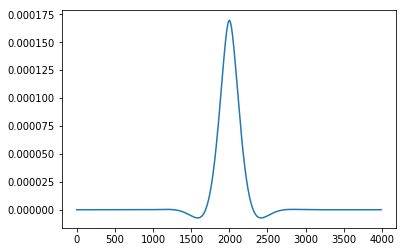

In [16]:
flex.load_at_node[1, 200] = 1e6
flex.update()
plt.plot(flex.x_at_node[1, :400] / 1000., flex.dz_at_node[1, :400])

Before we make any changes, reset the deflections to zero.

In [17]:
flex.dz_at_node[:] = 0.

Now we will double the effective elastic thickness but keep the same point load. Notice that, as expected, the deflections are more spread out.

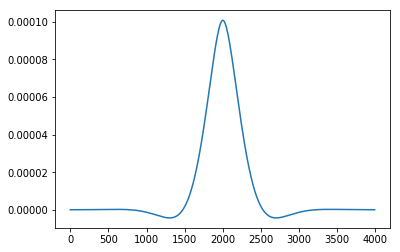

In [18]:
flex.eet *= 2.
flex.update()
plt.plot(flex.x_at_node[1, :400] / 1000., flex.dz_at_node[1, :400])

## Add some loading
We will now add a distributed load. As we saw above, for this component, the name of the attribute that hold the applied loads is call, `load_at_node`. For this example we create a loading that increases linearly of the center portion of the grid until some maximum. This could by thought of as the water load following a sea-level rise over a (linear) continental shelf.

In [19]:
flex.load_at_node[1, :100] = 0.
flex.load_at_node[1, 100:300] = np.arange(200) * 1e6 / 200.
flex.load_at_node[1, 300:] = 1e6

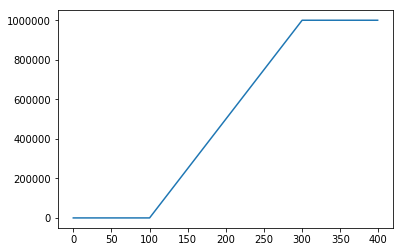

In [20]:
plt.plot(flex.load_at_node[1, :400])

## Update the component to solve for deflection
Clear the current deflections, and run *update* to get the new deflections.

In [21]:
flex.dz_at_node[:] = 0.
flex.update()

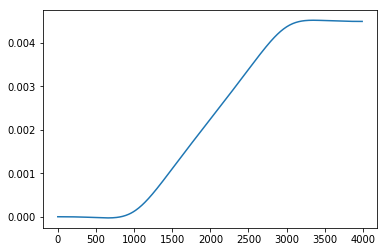

In [22]:
plt.plot(flex.x_at_node[1, :400] / 1000., flex.dz_at_node[1, :400])

Maintain the same loading distribution but double the effective elastic thickness.

### Click here for more <a href="https://github.com/landlab/landlab/wiki/Tutorials">Landlab tutorials</a>